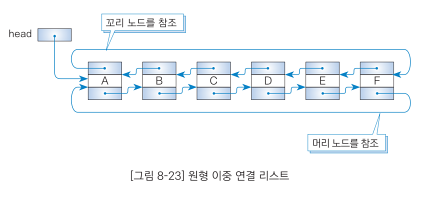

In [5]:
from typing import Any, Type

class Node:
    """원형 이중 연결 리스트용 노드 클래스"""

    def __init__(self, data: Any = None, prev = None,
                       next = None) -> None:
        """초기화"""
        self.data = data          # 데이터
        self.prev = prev or self  # 앞쪽 포인터
        self.next = next or self  # 뒤쪽 포인터

class DoubleLinkedList:
    """원형 이중 연결 리스트 클래스"""

    def __init__(self) -> None:
        """초기화"""
        self.head = self.current = Node()  # 더미 노드를 생성
        self.no = 0

    def __len__(self) -> int:
        """선형 리스트의 노드 수를 반환"""
        return self.no

    def is_empty(self) -> bool:
        """리스트가 비어 있는가?"""
        return self.head.next is self.head  

# Do it! 실습 8-5 [B]
    def search(self, data: Any) -> Any:
        """data와 값이 같은 노드를 검색"""
        cnt = 0
        ptr = self.head.next  # 현재 스캔 중인 노드
        while ptr is not self.head:
            if data == ptr.data:
                self.current = ptr
                return cnt  # 검색 성공
            cnt += 1
            ptr = ptr.next  # 뒤쪽 노드에 주목
        return -1           # 검색 실패

    def __contains__(self, data: Any) -> bool:
        """연결 리스트에 data가 포함되어 있는가?"""
        return self.search(data) >= 0

# Do it! 실습 8-5 [C]
    def print_current_node(self) -> None:
        """주목 노드를 출력"""
        if self.is_empty():
            print('주목 노드는 없습니다.')
        else:
            print(self.current.data)

    def print(self) -> None:
        """모든 노드를 출력"""
        ptr = self.head.next  # 더미 노드의 뒤쪽 노드
        while ptr is not self.head:
            print(ptr.data)
            ptr = ptr.next

    def print_reverse(self) -> None:
        """모든 노드를 역순으로 출력"""
        ptr = self.head.prev  # 더미 노드의 앞쪽 노드
        while ptr is not self.head:
            print(ptr.data)
            ptr = ptr.prev

    def next(self) -> bool:
        """주목 노드를 한 칸 뒤로 이동"""
        if self.is_empty() or self.current.next is self.head:
            return False  # 이동할 수 없음
        self.current = self.current.next
        return True

    def prev(self) -> bool:
        """주목 노드를 한 칸 앞으로 이동"""
        if self.is_empty() or self.current.prev is self.head:
            return False  # 이동할 수 없음
        self.current = self.current.prev
        return True

# Do it! 실습 8-5[D]
    def add(self, data: Any) -> None:
        """주목 노드의 바로 뒤에 노드를 삽입"""
        node = Node(data, self.current, self.current.next)
        self.current.next.prev = node
        self.current.next = node
        self.current = node
        self.no += 1

    def add_first(self, data: Any) -> None:
        """맨 앞에 노드를 삽입"""
        self.current = self.head  # 더미 노드 head의 바로 뒤에 삽입
        self.add(data)

    def add_last(self, data: Any) -> None:
        """맨 뒤에 노드를 삽입"""
        self.current = self.head.prev  # 꼬리 노드 head.prev의 바로 뒤에 삽입
        self.add(data)

# Do it! 실습 8-5[E]
    def remove_current_node(self) -> None:
        """주목 노드 삭제"""
        if not self.is_empty():
            self.current.prev.next = self.current.next
            self.current.next.prev = self.current.prev
            self.current = self.current.prev
            self.no -= 1
            if self.current is self.head:
                self.current = self.head.next

    def remove(self, p: Node) -> None:
        """노드 p를 삭제"""
        ptr = self.head.next

        while ptr is not self.head:
            if ptr is p:  # p를 발견
                self.current = p
                self.remove_current_node()
                break
            ptr = ptr.next

    def remove_first(self) -> None:
        """머리 노드 삭제"""
        self.current = self.head.next  # 머리 노드 head.next를 삭제
        self.remove_current_node()

    def remove_last(self) -> None:
        """꼬리 노드 삭제"""
        self.current = self.head.prev  # 꼬리 노드 head.prev를 삭제
        self.remove_current_node()

    def clear(self) -> None:
        """모든 노드를 삭제"""
        while not self.is_empty():  # 리스트 전체가 빌 때까지
            self.remove_first()  # 머리 노드를 삭제
        self.no = 0

# Do it! 실습 8-5[F]
    def __iter__(self):
        """반복자를 반환"""
        return DoubleLinkedListIterator(self.head)

    def __reversed__(self):
        """내림차순 반복자를 반환"""
        return DoubleLinkedListReverseIterator(self.head)

class DoubleLinkedListIterator:
    """DoubleLinkedList의 반복자용 클래스"""

    def __init__(self, head: Node):
        self.head = head
        self.current = head.next

    def __iter__(self):
        return self

    def __next__(self) -> Any:
        if self.current is self.head:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.next
            return data

class DoubleLinkedListReverseIterator:
    """DoubleLinkedList의 내림차순 반복자용 클래스"""

    def __init__(self, head: Node):
        self.head = head
        self.current = head.prev

    def __iter__(self):
        return self

    def __next__(self) -> Any:
        if self.current is self.head:
            raise StopIteration
        else:
            data = self.current.data
            self.current = self.current.prev
            return data